# Series

In this notebook we'll plot some of the series approximations to functions that you've derived in the lectures and the homework.

## sin(x)

The Taylor expansion of $sin (x)$ about $x = 0$ can be written as 
$$ \sin (x) = \sum_{n=0}^N \frac{(-1)^n}{(2n + 1)!} x^{2n + 1} .$$
Below we plot this for different upper limits of the sum, $N$.  We can see that as we include more terms, the approximation becomes better and better even for $x$ values much larger than $0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps

xv = np.linspace(0, 4.0*np.pi, 500)

In [2]:
def sin_approx(x, N):
    approx = np.zeros_like(x)
    for i in range(N):
        approx += ( (-1)**i / np.math.factorial(2*i + 1) ) * x**(2.0*i + 1.0)
    return approx

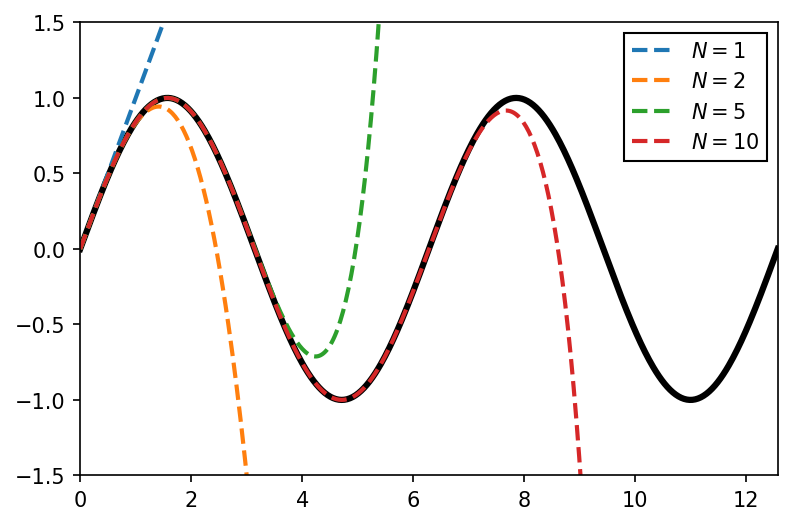

In [3]:
plt.figure(dpi=150)
plt.plot(xv, np.sin(xv), 'k-', lw=3)
for i in [1, 2, 5, 10]:
    plt.plot(xv, sin_approx(xv, i), '--', label="$N = %i$" %i, lw=2)
plt.xlim(xv[0], xv[-1])
plt.ylim(-1.5,1.5)
plt.legend(fancybox=False, edgecolor="k", framealpha=1)

plt.show()

## Geometric Series

Next, we look at the geometric series
$$\frac{1}{1-x} = \sum_{n=0}^N x^n .$$
If $|x| < 1$ then each term in the series is smaller than the last and this will converge, but the expansion breaks down quickly for $|x| > 1$ (try it out!).

In [4]:
def geom_approx(x, N):
    approx = np.zeros_like(x)
    for i in range(N):
        approx += x**i
    return approx

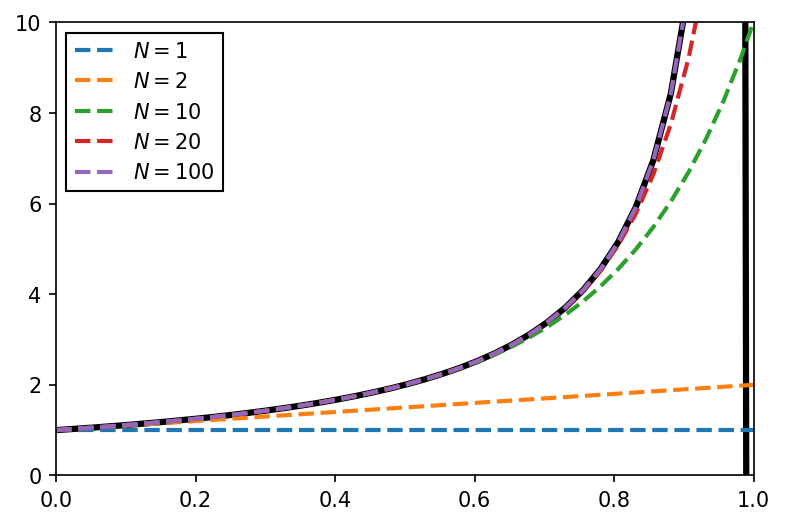

In [5]:
plt.figure(dpi=150)
plt.plot( xv, 1.0/(1.0-xv), 'k-', lw=3)
for i in [1, 2, 10, 20, 100]:
    plt.plot(xv, geom_approx(xv, i), '--', lw=2, label="$N = %i$" %i)
plt.xlim(0, 1)
plt.ylim(0,10)
plt.legend(fancybox=False, edgecolor="k", framealpha=1)

plt.show()

## Binomial Series

Finally, we consider the binomial series.  Scipy has a built in method for computing the binomial coefficients, making the plotting very easy.
$$(1+x)^\alpha = \sum_{n=0}^{\infty}
\begin{pmatrix}
\alpha \\
n 
\end{pmatrix}
x^n .$$
Once again, this only converges for $|x| < 1$.
Try changing $\alpha$ and see how well the approximation works for different powers.

In [6]:
alpha = 1/2
def bin_approx(x, N):
    approx = np.zeros_like(x)
    for i in range(N):
        approx += sps.binom(alpha, i) * x**i
    return approx

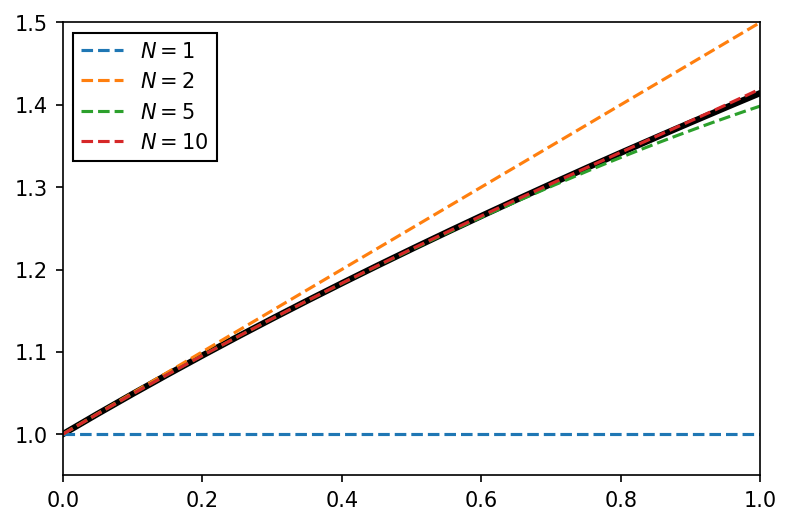

In [7]:
plt.figure(dpi=150)
plt.plot(xv, (1.0 + xv)**(alpha), 'k-', lw=3)
for i in [1, 2, 5, 10]:
    plt.plot(xv, bin_approx(xv, i), '--', label="$N = %i$" %i)
plt.xlim(xv[0], 1)
plt.ylim(0.95,1.5)
plt.legend(fancybox=False, edgecolor="k", framealpha=1)
plt.show()